<a href="https://colab.research.google.com/github/cxrles/Covid-non_Covid-dataset/blob/main/Proyek_Kelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Pengerjaan proyek Kelompok 5
Kami Menyarankan untuk membuka notebook ini dengan menggunakan google colab

Untuk Mempercepat proses training nantinya gunakanlah GPU dalam prosesnya. Untuk mengaktifkannya lakukan:

Edit>>Notebook settings >>Hardware accelerator:GPU


## Import Module yang akan digunakan

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

## Mendapatkan data set

In [ ]:
import zipfile
import os

In [ ]:

!wget --no-check-certificate \
    "https://github.com/cxrles/Covid-non_Covid-dataset/archive/refs/heads/main.zip" \
    -O "/tmp/Covid-non_Covid.zip"


zip_ref = zipfile.ZipFile("/tmp/Covid-non_Covid.zip", 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-05-31 11:14:36--  https://github.com/cxrles/Covid-non_Covid-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cxrles/Covid-non_Covid-dataset/zip/refs/heads/main [following]
--2022-05-31 11:14:36--  https://codeload.github.com/cxrles/Covid-non_Covid-dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/Covid-non_Covid.zip’

/tmp/Covid-non_Covi     [  <=>               ] 488.49M  36.9MB/s    in 13s     

2022-05-31 11:14:50 (37.0 MB/s) - ‘/tmp/Covid-non_Covid.zip’ saved [512220102]



## meload semua path dari data

In [ ]:
levels = ['Normal', 'COVID']
path = "/tmp/Covid-non_Covid-dataset-main/Data"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path  + "/" + data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Negative', 'COVID': 'Positive'})

data.head()

,image_file,corona_result,path
0,Normal/Normal-306.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
1,Normal/Normal-6971.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
2,Normal/Normal-3461.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
3,Normal/Normal-6656.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
4,Normal/Normal-8120.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...


In [ ]:
data.shape

(13808, 3)

## Preprocessing data

In [ ]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))/255.0
data['image']= data['image'].map(lambda x: x.reshape(75,75,1))

data.head()

,image_file,corona_result,path,image
0,Normal/Normal-306.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[0.23921568627450981], [0.396078431372549], ..."
1,Normal/Normal-6971.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
2,Normal/Normal-3461.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[0.9294117647058824], [0.9254901960784314], ..."
3,Normal/Normal-6656.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[0.06666666666666667], [0.10588235294117647]..."
4,Normal/Normal-8120.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[0.00784313725490196], [0.011764705882352941..."


Negative


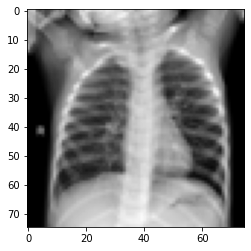

In [ ]:
plt.imshow(data['image'][10].reshape(75,75),cmap='gray')
print(data['corona_result'][10])

## Membuat Model

In [ ]:
all_data=[]
for i in range (len(data)):
    y=1
    if data['corona_result'][i]== 'Negative':
        y=0
    
    all_data.append([data['image'][i],y])

In [ ]:
x = []
y = []
for image, label in all_data:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [ ]:


# 70% of data is training data, set aside other 30%
x_train, x_OTHER, y_train, y_OTHER = train_test_split(x, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
x_eval, x_test, y_eval, y_test = train_test_split(x_OTHER, y_OTHER, test_size=0.5, random_state=101)

print(x_train.shape, x_test.shape, x_eval.shape, y_train.shape, y_test.shape, y_eval.shape)



(9665, 75, 75, 1) (2072, 75, 75, 1) (2071, 75, 75, 1) (9665,) (2072,) (2071,)


In [ ]:
def kel5net(): #proposed model
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               padding='same', input_shape=(75,75,1)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2,activation='sigmoid')])
    

net=kel5net()
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 18, 18, 32)        0         
                                                                 
 flatten (Flatten)           (None, 10368)             0

In [ ]:
test_input = tf.random.uniform((1, 75, 75, 1))
print(net(test_input))

tf.Tensor([[0.5222938 0.5249571]], shape=(1, 2), dtype=float32)


In [ ]:
net.compile(optimizer = 'adam', 
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
           metrics = ['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)




model= net.fit(x_train, y_train, 
                        epochs = 50,
                        validation_data = (x_eval, y_eval),
                        batch_size=256,
                        callbacks=[es]
                        )

Epoch 1/50
38/38 [==============================] - 4s 55ms/step - loss: 0.6225 - accuracy: 0.7133 - val_loss: 0.5057 - val_accuracy: 0.7359
Epoch 2/50
38/38 [==============================] - 1s 38ms/step - loss: 0.4671 - accuracy: 0.7641 - val_loss: 0.4146 - val_accuracy: 0.8151
Epoch 3/50
38/38 [==============================] - 1s 38ms/step - loss: 0.3963 - accuracy: 0.8098 - val_loss: 0.3701 - val_accuracy: 0.8291
Epoch 4/50
38/38 [==============================] - 1s 38ms/step - loss: 0.3507 - accuracy: 0.8357 - val_loss: 0.3212 - val_accuracy: 0.8624
Epoch 5/50
38/38 [==============================] - 2s 42ms/step - loss: 0.3232 - accuracy: 0.8514 - val_loss: 0.3143 - val_accuracy: 0.8619
Epoch 6/50
38/38 [==============================] - 1s 38ms/step - loss: 0.2970 - accuracy: 0.8678 - val_loss: 0.2807 - val_accuracy: 0.8914
Epoch 7/50
38/38 [==============================] - 1s 38ms/step - loss: 0.2743 - accuracy: 0.8848 - val_loss: 0.2690 - val_accuracy: 0.8909
Epoch 8/50
38

## Performance Analysis

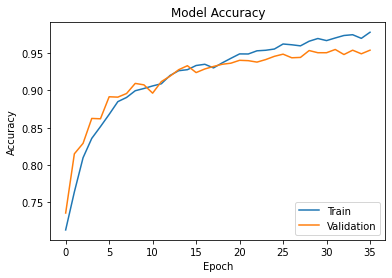

In [18]:
# Summarize History for Accuracy

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

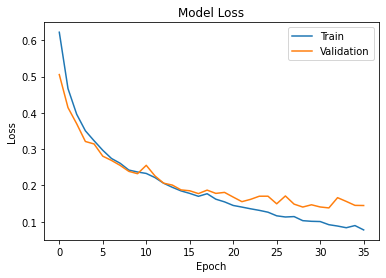

In [19]:
# Summarize History for Loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

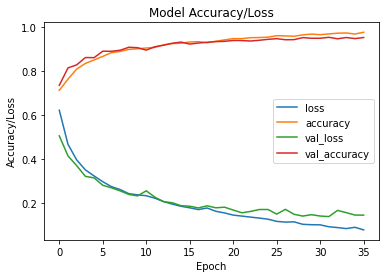

In [34]:
# Accuracy Loss Graph

pd.DataFrame(model.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [25]:
def report_model(model,x_test,y_test):
  yp_test = model.predict(x_test)
  yp_test = np.argmax(yp_test, axis = 1)
  cm=confusion_matrix(yp_test,y_test)
  cm= ConfusionMatrixDisplay(cm)
  cm.plot()
  print(classification_report(y_test, yp_test))



Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1536
           1       0.92      0.92      0.92       536

    accuracy                           0.96      2072
   macro avg       0.95      0.94      0.94      2072
weighted avg       0.96      0.96      0.96      2072



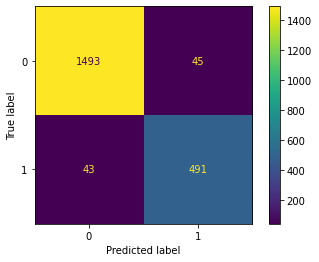

In [30]:
print("\nClassification Report for Test Data\n")
report_model(net,x_test,y_test) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1524
           1       0.93      0.89      0.91       547

    accuracy                           0.95      2071
   macro avg       0.95      0.93      0.94      2071
weighted avg       0.95      0.95      0.95      2071



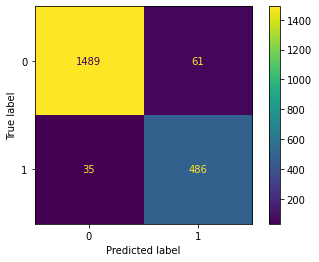

In [29]:
  print("\nClassification Report for Validation data \n")
report_model(net,x_eval,y_eval)


Classification Report for training data 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7132
           1       0.99      0.98      0.99      2533

    accuracy                           0.99      9665
   macro avg       0.99      0.99      0.99      9665
weighted avg       0.99      0.99      0.99      9665



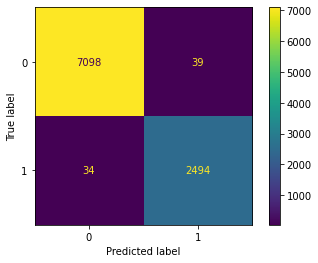

In [32]:
  print("\nClassification Report for training data \n")
report_model(net,x_train, y_train)